# Redes Neuronales para Clasificación de Dígitos con Keras

<a href="https://colab.research.google.com/github/Antonio-Tresol/ai_workshop_2025_fast_intro/blob/main/examples/bonus_neural_networks_with_keras.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Abrir en Colab"/>
</a>

## Introducción

En este notebook, exploraremos cómo construir una red neuronal utilizando Keras para clasificar dígitos manuscritos del dataset MNIST. Este es un problema clásico de clasificación de imágenes y un excelente punto de partida para aprender sobre redes neuronales.

El conjunto de datos MNIST contiene 70,000 imágenes en escala de grises de dígitos manuscritos (del 0 al 9), cada una de tamaño 28x28 píxeles. Utilizaremos una red neuronal para aprender a reconocer estos dígitos.

<div align="center">
    <img src="https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png" width="600" style="border: 1px solid black; border-radius: 10px;">
    <p><strong>Figura 1:</strong> Ejemplos de imágenes del dataset MNIST. </p>
</div>

## 1. Importar las bibliotecas necesarias

Ejecute la celda a continuación para instalar las bibliotecas necesarias.

In [ ]:
%pip install keras
%pip install matplotlib
%pip install numpy

Ahora importamos las bibliotecas necesarias para este proyecto.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras import layers

# Verificamos la versión de TensorFlow/Keras
print("Keras versión:", keras.__version__)

Keras versión: 3.8.0


## 2. Cargar y explorar el dataset MNIST

Keras proporciona acceso directo al conjunto de datos MNIST a través de su API de datasets.

In [2]:
# Cargar el dataset MNIST
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Exploramos las dimensiones de nuestros datos
print(f"Forma de x_train: {x_train.shape}")
print(f"Forma de y_train: {y_train.shape}")
print(f"Forma de x_test: {x_test.shape}")
print(f"Forma de y_test: {y_test.shape}")

Forma de x_train: (60000, 28, 28)
Forma de y_train: (60000,)
Forma de x_test: (10000, 28, 28)
Forma de y_test: (10000,)


Visualicemos algunos ejemplos de dígitos del conjunto de entrenamiento:

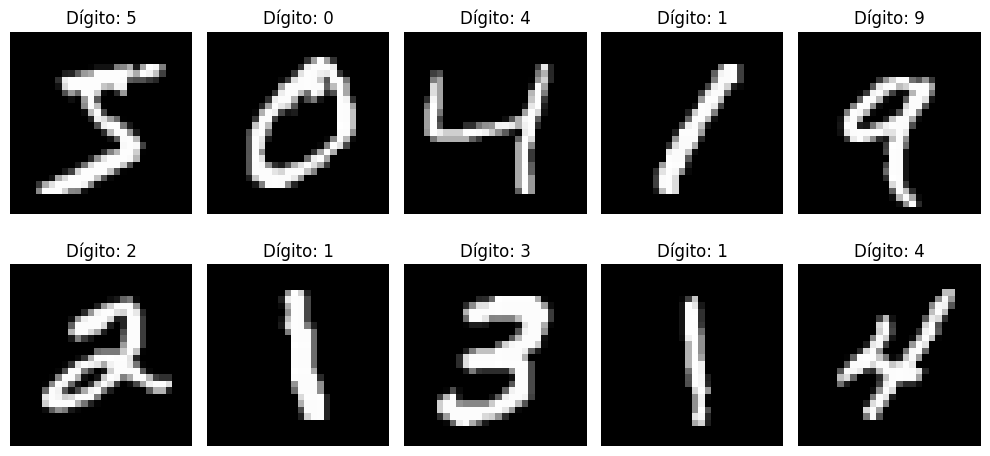

In [3]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f'Dígito: {y_train[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

## 3. Preprocesar los datos

Es necesario preprocesar nuestros datos antes de alimentarlos a la red neuronal:
1. Normalizar los valores de píxeles (de 0-255 a 0-1)
2. Convertir las etiquetas en formato categorical (one-hot encoding)
3. Reformatear las imágenes para que se ajusten a la entrada de nuestra red

Lo anterior es útil para mejorar la convergencia y la precisión de nuestra red. Muchos algoritmos de optimización convergen más rápido cuando los datos están normalizados.

In [4]:
# Normalizar los valores de píxeles de 0-255 a 0-1
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Reformatear las imágenes para que se ajusten a la entrada de nuestra red
# Las imágenes son de 28x28 píxeles, debemos 'aplanarlas'
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

# Convertir las etiquetas a formato one-hot encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

print("Forma después del preprocesamiento:")
print(f"x_train: {x_train.shape}")
print(f"y_train: {y_train.shape}")

Forma después del preprocesamiento:
x_train: (60000, 28, 28, 1)
y_train: (60000, 10)


## 4. Crear un modelo de red neuronal convolucional (CNN)

Para el reconocimiento de imágenes, las redes neuronales convolucionales (CNN) son muy efectivas. Crearemos una CNN sencilla con las siguientes capas:

1. **Capas convolucionales**: Extraen características de la imagen mediante filtros
2. **Capas MaxPooling**: Reducen el tamaño espacial para disminuir la complejidad
3. **Capa Flatten**: Convierte la matriz 2D en un vector 1D
4. **Capas densas**: Aprenden relaciones no lineales en los datos
5. **Capa de salida**: 10 neuronas (una para cada dígito) con activación softmax

In [5]:
# Crear el modelo de red neuronal (FFNN simple)
modelo = keras.Sequential(
    [
        layers.Input(shape=(28,28,1)),
        # Aplanar la entrada (imágenes 28x28)
        layers.Flatten(),
        
        # Primera capa densa (fully connected)
        layers.Dense(128, activation="relu"),
        
        # Segunda capa densa
        layers.Dense(64, activation="relu"),
        
        # Capa de salida (10 neuronas para los 10 dígitos)
        layers.Dense(10, activation="softmax")
    ]
)

# Resumen del modelo
modelo.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

## 5. Compilar el modelo

Compilamos nuestro modelo con los siguientes componentes:

- **Optimizador**: Adam - Un algoritmo de optimización que ajusta la tasa de aprendizaje
- **Función de pérdida**: Categorical Crossentropy - Apropiada para problemas de clasificación multiclase
- **Métricas**: Accuracy - Porcentaje de imágenes clasificadas correctamente

In [6]:
modelo.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

## 6. Entrenar el modelo

Entrenaremos nuestro modelo usando los datos de entrenamiento. En este proceso el modelo ajusta sus pesos para minimizar la función de pérdida y mejorar su precisión.

In [7]:
# Entrenar el modelo
historial = modelo.fit(
    x_train, y_train,  # Datos de entrenamiento
    batch_size=128,     # Número de muestras a procesar antes de actualizar el modelo
    epochs=5,          # Número de veces que el modelo ve todo el conjunto de datos
    validation_split=0.1  # Usar 10% de los datos de entrenamiento como validación
)

Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8075 - loss: 0.6552 - val_accuracy: 0.9572 - val_loss: 0.1545
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9570 - loss: 0.1463 - val_accuracy: 0.9727 - val_loss: 0.0998
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9708 - loss: 0.1014 - val_accuracy: 0.9733 - val_loss: 0.0945
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9781 - loss: 0.0735 - val_accuracy: 0.9740 - val_loss: 0.0828
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9831 - loss: 0.0566 - val_accuracy: 0.9768 - val_loss: 0.0810


## 7. Evaluar el modelo

Evaluamos el rendimiento del modelo en el conjunto de prueba para ver qué tan bien generaliza a datos no vistos durante el entrenamiento.

In [8]:
# Evaluar el modelo en el conjunto de prueba
resultado = modelo.evaluate(x_test, y_test, verbose=0)
print(f"Pérdida en el conjunto de prueba: {resultado[0]:.4f}")
print(f"Precisión en el conjunto de prueba: {resultado[1]:.4f} ({resultado[1]*100:.2f}%)")

Pérdida en el conjunto de prueba: 0.0818
Precisión en el conjunto de prueba: 0.9754 (97.54%)


Visualicemos el progreso del entrenamiento para ver cómo ha mejorado el modelo a lo largo de las épocas:

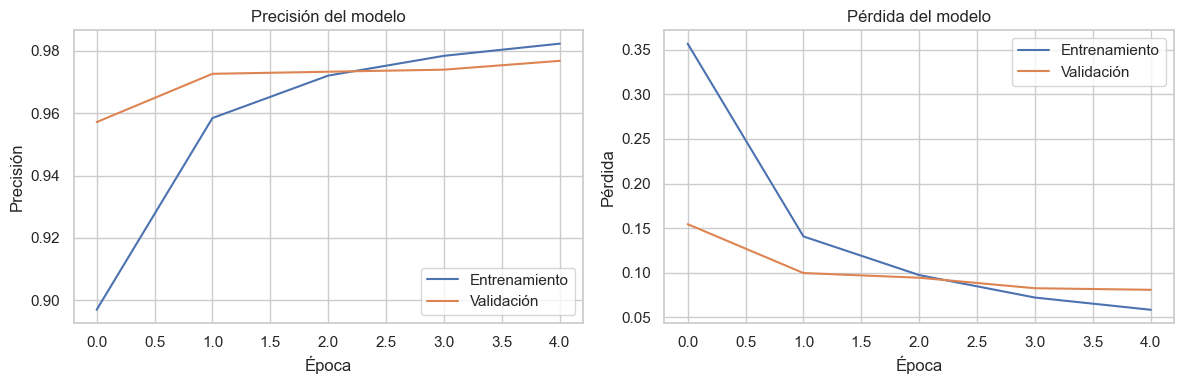

In [15]:
def graph_training_history() -> None:
    # Graficar el historial de entrenamiento
    plt.figure(figsize=(12, 4))

    # Gráfica de precisión
    plt.subplot(1, 2, 1)
    plt.plot(historial.history['accuracy'], label='Entrenamiento')
    plt.plot(historial.history['val_accuracy'], label='Validación')
    plt.title('Precisión del modelo')
    plt.xlabel('Época')
    plt.ylabel('Precisión')
    plt.legend()

    # Gráfica de pérdida
    plt.subplot(1, 2, 2)
    plt.plot(historial.history['loss'], label='Entrenamiento')
    plt.plot(historial.history['val_loss'], label='Validación')
    plt.title('Pérdida del modelo')
    plt.xlabel('Época')
    plt.ylabel('Pérdida')
    plt.legend()

    plt.tight_layout()
    plt.show()

graph_training_history()

## 8. Visualizar las predicciones

Veamos cómo el modelo predice algunos dígitos del conjunto de prueba:

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 729us/step


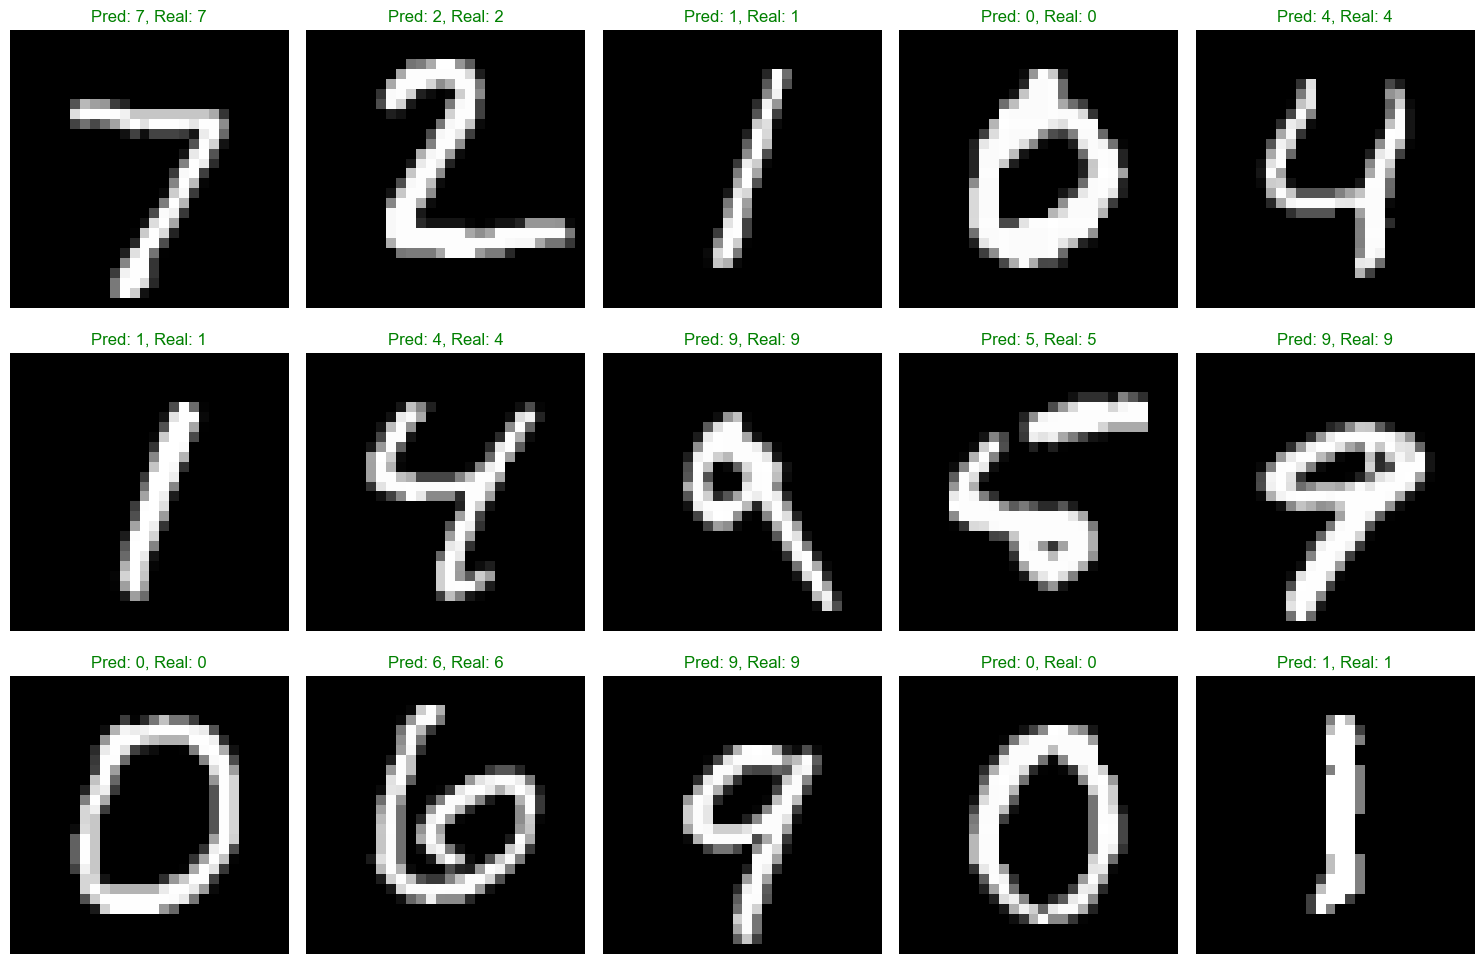

In [16]:
# Obtener predicciones para el conjunto de prueba
predicciones = modelo.predict(x_test)

# Convertir las predicciones y etiquetas a formato numérico
predicciones_clase = np.argmax(predicciones, axis=1)
etiquetas_reales = np.argmax(y_test, axis=1)

# Mostrar algunas predicciones
num_filas = 3
num_cols = 5
num_imagenes = num_filas * num_cols
plt.figure(figsize=(15, 10))

for i in range(num_imagenes):
    plt.subplot(num_filas, num_cols, i+1)
    # Mostrar imagen
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    
    color = 'green' if predicciones_clase[i] == etiquetas_reales[i] else 'red'
    plt.title(f'Pred: {predicciones_clase[i]}, Real: {etiquetas_reales[i]}', color=color)
    plt.axis('off')
    
plt.tight_layout()
plt.show()

## 9. Conclusiones

En este notebook, hemos:

1. Cargado y explorado el dataset MNIST de dígitos manuscritos
2. Preprocesado los datos para adaptarlos a nuestra red neuronal
3. Construido una red neuronal convolucional (CNN) con Keras
4. Entrenado el modelo y observado su progreso
5. Evaluado el rendimiento del modelo en datos no vistos
6. Visualizado las predicciones del modelo

Este es un buen punto de partida para comprender cómo funcionan las redes neuronales para el reconocimiento de imágenes. A partir de aquí, podría experimentar modificando la arquitectura de la red, ajustando hiperparámetros o probando con conjuntos de datos más complejos.